### Forest Fire Detection using ML

### Problem Statement
1) Wildfires in California are strongly influenced by weather and seasonal factors, making early prediction essential for risk mitigation. This problem aims to predict whether a wildfire will start on a given day using historical weather data and engineered temporal features from 1984–2025. By modeling relationships among temperature, precipitation, wind, and lagged conditions, the goal is to improve the accuracy of wildfire risk prediction.

### Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [34]:
df=pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\Projects\Forest Fire\Notebook\data\CA_Weather_Fire_Dataset_1984-2025.csv")

In [35]:
df

,DATE,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,FIRE_START_DAY,YEAR,TEMP_RANGE,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,DAY_OF_YEAR
0,1984-01-01,0.0,79.0,51.0,4.70,False,1984,28.0,0.059494,1,Winter,0.0,4.700000,1
1,1984-01-02,0.0,71.0,46.0,5.59,False,1984,25.0,0.078732,1,Winter,0.0,5.145000,2
2,1984-01-03,0.0,70.0,47.0,5.37,False,1984,23.0,0.076714,1,Winter,0.0,5.220000,3
3,1984-01-04,0.0,76.0,45.0,4.70,False,1984,31.0,0.061842,1,Winter,0.0,5.090000,4
4,1984-01-05,0.0,74.0,49.0,5.14,False,1984,25.0,0.069459,1,Winter,0.0,5.100000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14983,2025-01-08,0.0,73.0,53.0,10.51,False,2025,20.0,0.143973,1,Winter,0.0,6.485714,8
14984,2025-01-09,0.0,68.0,46.0,4.92,False,2025,22.0,0.072353,1,Winter,0.0,6.550000,9
14985,2025-01-10,0.0,70.0,46.0,3.58,False,2025,24.0,0.051143,1,Winter,0.0,6.327143,10
14986,2025-01-11,0.0,66.0,46.0,NaN,False,2025,20.0,NaN,1,Winter,0.0,6.561667,11


| Column                    | Meaning                                    | Importance / Relation to Wildfire Prediction                    |
| ------------------------- | ------------------------------------------ | --------------------------------------------------------------- |
| **DATE**                  | Date of observation                        | Temporal reference for weather–fire alignment                   |
| **PRECIPITATION**         | Daily precipitation (inches)               | Low or no rainfall increases dryness → higher fire risk         |
| **MAX_TEMP**              | Maximum daily temperature (°F)             | High temperatures dry vegetation → strong fire trigger          |
| **MIN_TEMP**              | Minimum daily temperature (°F)             | Helps assess daily thermal conditions and variability           |
| **AVG_WIND_SPEED**        | Average daily wind speed (mph)             | Wind accelerates fire spread and ignition probability           |
| **FIRE_START_DAY**        | Wildfire occurrence indicator (True/False) | **Target variable** for prediction                              |
| **YEAR**                  | Year of observation                        | Captures long-term climate and trend effects                    |
| **TEMP_RANGE**            | Max − Min temperature                      | Large variation indicates unstable atmospheric conditions       |
| **WIND_TEMP_RATIO**       | Wind speed to temperature ratio            | Captures combined wind–heat interaction affecting fire behavior |
| **MONTH**                 | Month (1–12)                               | Identifies seasonal fire patterns                               |
| **SEASON**                | Winter / Spring / Summer / Fall            | Fires are more frequent in dry seasons (Summer/Fall)            |
| **LAGGED_PRECIPITATION**  | 7-day cumulative precipitation             | Low values indicate dry fuel buildup                            |
| **LAGGED_AVG_WIND_SPEED** | 7-day average wind speed                   | Sustained winds increase ignition and spread risk               |
| **DAY_OF_YEAR**           | Day index within year (1–365/366)          | Encodes cyclical seasonal trends                                |


In [36]:
df.rename(columns={'FIRE_START_DAY':'Fire_Occured'},inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14988 entries, 0 to 14987
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DATE                   14988 non-null  object 
 1   PRECIPITATION          14987 non-null  float64
 2   MAX_TEMP               14987 non-null  float64
 3   MIN_TEMP               14987 non-null  float64
 4   AVG_WIND_SPEED         14976 non-null  float64
 5   Fire_Occured           14988 non-null  bool   
 6   YEAR                   14988 non-null  int64  
 7   TEMP_RANGE             14987 non-null  float64
 8   WIND_TEMP_RATIO        14976 non-null  float64
 9   MONTH                  14988 non-null  int64  
 10  SEASON                 14988 non-null  object 
 11  LAGGED_PRECIPITATION   14988 non-null  float64
 12  LAGGED_AVG_WIND_SPEED  14988 non-null  float64
 13  DAY_OF_YEAR            14988 non-null  int64  
dtypes: bool(1), float64(8), int64(3), object(2)
memory usa

In [38]:
df.drop(columns={'DATE','DAY_OF_YEAR','TEMP_RANGE'},inplace=True)

In [39]:
df['MAX_TEMP']=(df['MAX_TEMP']-32)*5/9
df['MIN_TEMP']=(df['MAX_TEMP']-32)*5/9
df["TEMP_RANGE"] = df["MAX_TEMP"] - df["MIN_TEMP"]

In [40]:
df.head()

,PRECIPITATION,MAX_TEMP,MIN_TEMP,AVG_WIND_SPEED,Fire_Occured,YEAR,WIND_TEMP_RATIO,MONTH,SEASON,LAGGED_PRECIPITATION,LAGGED_AVG_WIND_SPEED,TEMP_RANGE
0,0.0,26.111111,-3.271605,4.70,False,1984,0.059494,1,Winter,0.0,4.700,29.382716
1,0.0,21.666667,-5.740741,5.59,False,1984,0.078732,1,Winter,0.0,5.145,27.407407
2,0.0,21.111111,-6.049383,5.37,False,1984,0.076714,1,Winter,0.0,5.220,27.160494
3,0.0,24.444444,-4.197531,4.70,False,1984,0.061842,1,Winter,0.0,5.090,28.641975
4,0.0,23.333333,-4.814815,5.14,False,1984,0.069459,1,Winter,0.0,5.100,28.148148


In [41]:
df.isnull().sum()

PRECIPITATION             1
MAX_TEMP                  1
MIN_TEMP                  1
AVG_WIND_SPEED           12
Fire_Occured              0
YEAR                      0
WIND_TEMP_RATIO          12
MONTH                     0
SEASON                    0
LAGGED_PRECIPITATION      0
LAGGED_AVG_WIND_SPEED     0
TEMP_RANGE                1
dtype: int64

In [42]:
df.isnull().sum()/len(df)*100

PRECIPITATION            0.006672
MAX_TEMP                 0.006672
MIN_TEMP                 0.006672
AVG_WIND_SPEED           0.080064
Fire_Occured             0.000000
YEAR                     0.000000
WIND_TEMP_RATIO          0.080064
MONTH                    0.000000
SEASON                   0.000000
LAGGED_PRECIPITATION     0.000000
LAGGED_AVG_WIND_SPEED    0.000000
TEMP_RANGE               0.006672
dtype: float64

In [43]:
df.dropna(inplace=True)

In [44]:
df.duplicated().sum()

np.int64(7)

In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.nunique()

PRECIPITATION             184
MAX_TEMP                   57
MIN_TEMP                   57
AVG_WIND_SPEED             89
Fire_Occured                2
YEAR                       42
WIND_TEMP_RATIO          1660
MONTH                      12
SEASON                      4
LAGGED_PRECIPITATION      994
LAGGED_AVG_WIND_SPEED    1523
TEMP_RANGE                 57
dtype: int64

In [47]:
for c in df.columns:
    if df[c].dtype == "object":
        df[c]=df[c].str.replace(' ','',regex=False)
        df[c]=df[c].str.replace('\t','',regex=False)
        print(f"Categories in {c} variable:-----------> ",end=" " )
        print(df[c].unique())
        print()

Categories in SEASON variable:----------->  ['Winter' 'Spring' 'Summer' 'Fall']



In [48]:
df.loc[df["Fire_Occured"] == False, "Fire_Occured"] = 0
df.loc[df["Fire_Occured"] == True,  "Fire_Occured"] = 1

C:\Users\Asus\AppData\Local\Temp\ipykernel_23368\1557517729.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df["Fire_Occured"] == False, "Fire_Occured"] = 0


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRECIPITATION,14969.0,0.032354,0.179648,0.000000,0.000000,0.000000,0.000000,4.530000
MAX_TEMP,14969.0,21.411473,4.035204,10.000000,18.333333,21.111111,23.888889,41.111111
MIN_TEMP,14969.0,-5.882515,2.241780,-12.222222,-7.592593,-6.049383,-4.506173,5.061728
AVG_WIND_SPEED,14969.0,7.435364,2.130374,1.790000,6.040000,7.160000,8.500000,26.170000
YEAR,14969.0,2004.004743,11.837908,1984.000000,1994.000000,2004.000000,2014.000000,2025.000000
WIND_TEMP_RATIO,14969.0,0.107024,0.035637,0.023553,0.085238,0.102222,0.120462,0.459123
MONTH,14969.0,6.517670,3.450048,1.000000,4.000000,7.000000,10.000000,12.000000
LAGGED_PRECIPITATION,14969.0,0.226466,0.649069,0.000000,0.000000,0.000000,0.060000,8.180000
LAGGED_AVG_WIND_SPEED,14969.0,7.434111,1.385190,3.227143,6.518571,7.478571,8.278571,13.932857
TEMP_RANGE,14969.0,27.293988,1.793424,22.222222,25.925926,27.160494,28.395062,36.049383


### Insights
1️⃣ Precipitation

. The mean and median precipitation values are extremely low, with the 50th and 75th percentiles at zero.

. This indicates prolonged dry conditions, which significantly increase vegetation dryness and wildfire risk.

2️⃣ Maximum & Minimum Temperature (MAX_TEMP & MIN_TEMP)

. MAX_TEMP shows a relatively high mean with extreme upper values, while MIN_TEMP frequently falls below zero.

. Large temperature extremes contribute to fuel drying during the day and atmospheric instability, creating favorable fire conditions.

3️⃣ Average Wind Speed (AVG_WIND_SPEED)

. The mean wind speed is moderately high, with extreme values reaching over 26 mph.

. Strong winds play a crucial role in fire ignition and rapid spread, making wind speed a critical predictive feature.

4️⃣ Temperature Range (TEMP_RANGE)

. TEMP_RANGE has a consistently high mean and upper quartile values.

. Large daily temperature fluctuations indicate volatile weather patterns that accelerate moisture loss from vegetation.

5️⃣ Wind–Temperature Ratio (WIND_TEMP_RATIO)

. The ratio shows moderate variability with notable upper extremes.

. Higher values suggest dangerous combinations of strong winds and high temperatures, intensifying wildfire behavior.

6️⃣ Lagged Precipitation (LAGGED_PRECIPITATION)

. The median lagged precipitation is zero, with low values even at the 75th percentile.

. This reflects sustained dry spells over consecutive days, a major precursor to wildfire ignition.

7️⃣ Lagged Average Wind Speed (LAGGED_AVG_WIND_SPEED)

. Lagged wind speed remains consistently high across percentiles.

. Sustained windy conditions over several days increase the likelihood of fire spread once ignition occurs.

8️⃣ Temporal Features (YEAR, MONTH)

. The dataset spans over four decades, capturing long-term climate trends and seasonal variability.

. Higher month values align with peak fire seasons (summer and fall), reinforcing the seasonal nature of wildfires.

In [50]:
df['Fire_Occured']=pd.to_numeric(df['Fire_Occured'],errors='coerce')

In [51]:
cat=[]
num=[]

for c in df.columns:
    if df[c].dtype==object:
        cat.append(c)
    else:
        num.append(c)

In [52]:
num

['PRECIPITATION',
 'MAX_TEMP',
 'MIN_TEMP',
 'AVG_WIND_SPEED',
 'Fire_Occured',
 'YEAR',
 'WIND_TEMP_RATIO',
 'MONTH',
 'LAGGED_PRECIPITATION',
 'LAGGED_AVG_WIND_SPEED',
 'TEMP_RANGE']

In [53]:
cat

['SEASON']

EDA

In [54]:
df2=df.copy()

Fire_Occured
0    66.818091
1    33.181909
Name: proportion, dtype: float64


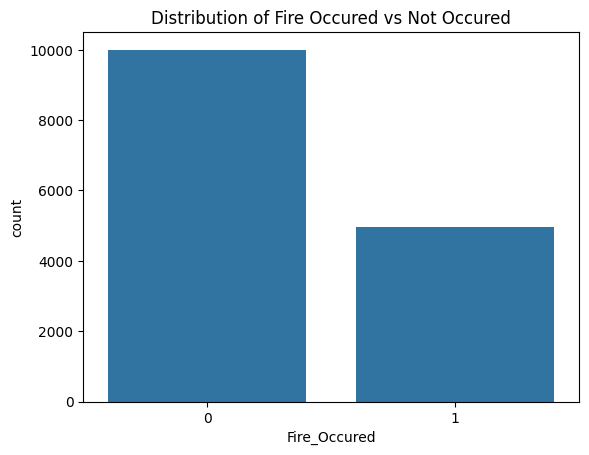

In [55]:
print(df2['Fire_Occured'].value_counts(normalize=True)*100)
sns.countplot(data=df2,x='Fire_Occured')
plt.title('Distribution of Fire Occured vs Not Occured')
plt.show()

### Insights

- The dataset reveals that non-fire days significantly outnumber fire-occurrence days, indicating a clear class imbalance in wildfire events.

- This highlights the importance of careful model design and imbalance handling techniques to ensure accurate detection of wildfire-prone days rather than biased predictions toward no-fire outcomes.

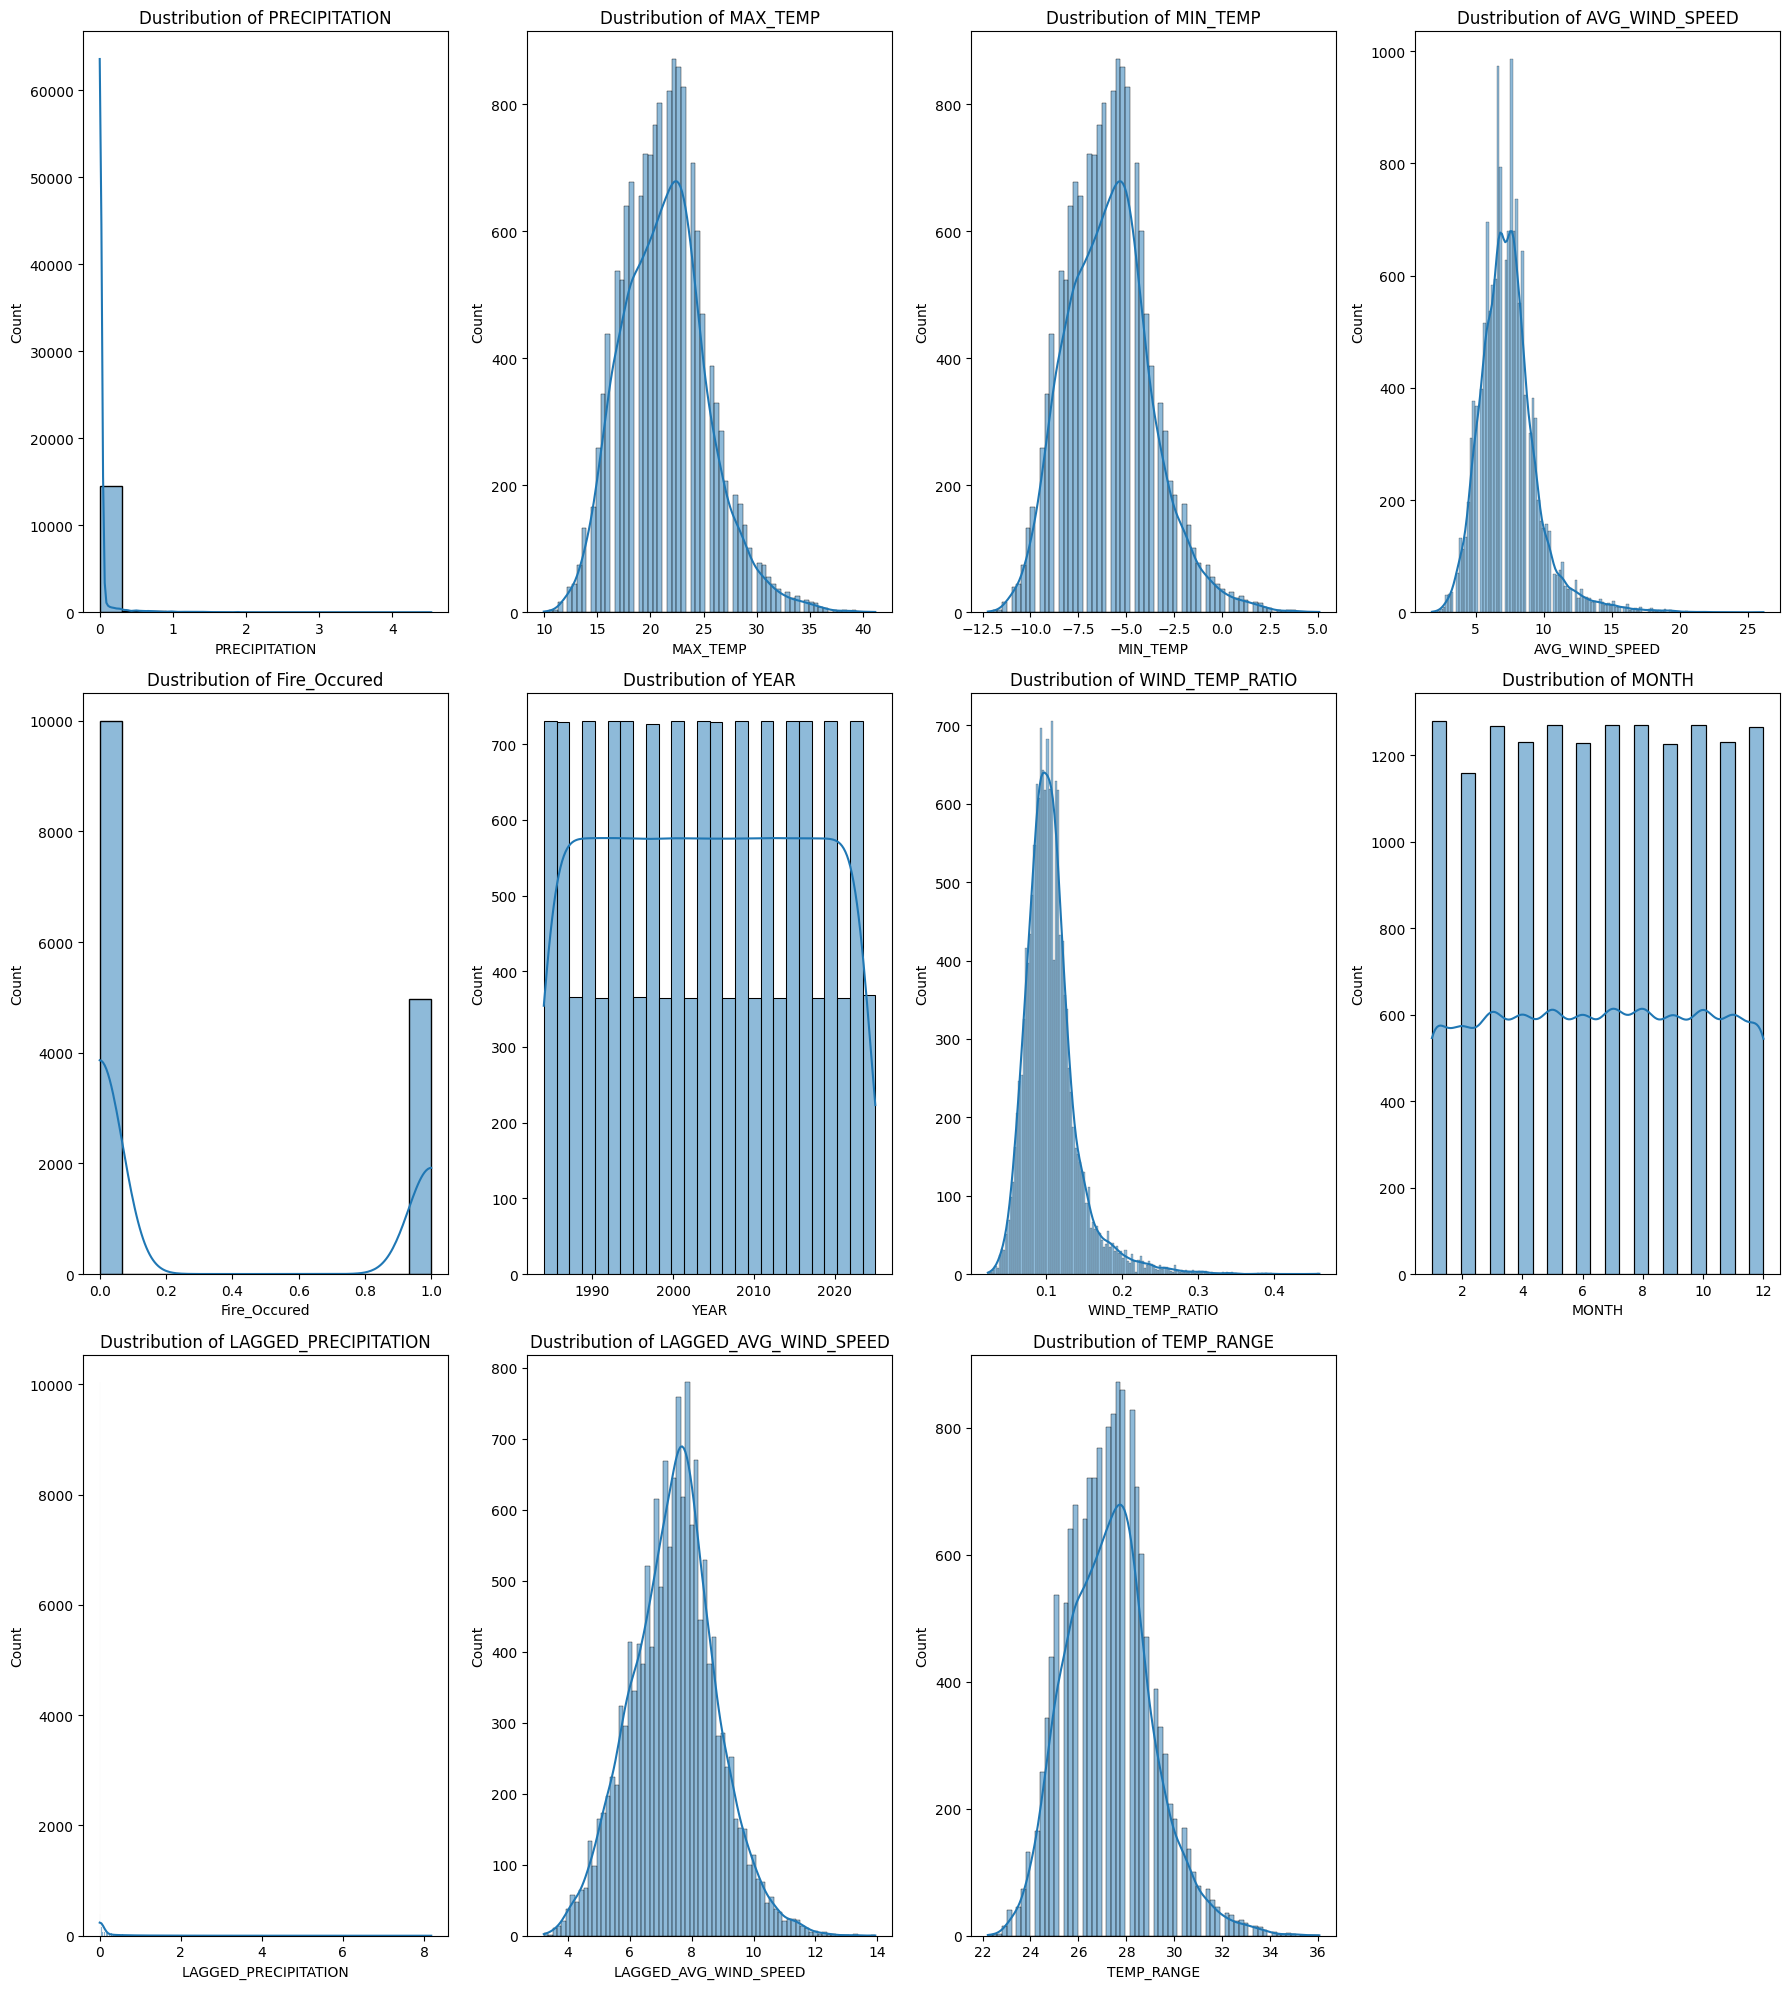

In [56]:
plt.figure(figsize=(18,20))
for i,c in enumerate(num):
    plt.subplot(3,4,i+1)
    sns.histplot(data=df2,x=c,kde=True)
    plt.title(f"Dustribution of {c}")
plt.tight_layout()
plt.show()

### Insights

1️⃣ Precipitation

. Most observations are clustered at zero or near-zero precipitation values.

. Higher precipitation values occur very rarely.
  ➡ Near-zero rainfall significantly increases surface dryness, making wildfire ignition more likely.

2️⃣ Maximum Temperature (MAX_TEMP)

. MAX_TEMP follows an approximately normal distribution, centered around moderate-to-high temperatures.

. Extreme high-temperature outliers are present.
  ➡ Higher maximum temperatures increase fuel desiccation, elevating wildfire risk.

3️⃣ Minimum Temperature (MIN_TEMP)

. MIN_TEMP values are mostly concentrated below freezing with a left-skewed tail.

. Cold nights followed by warm days create high diurnal variation.
  ➡ Large temperature swings contribute to vegetation stress, indirectly increasing fire susceptibility.

4️⃣ Average Wind Speed (AVG_WIND_SPEED)

. Most wind speeds lie between 5–10 mph, with extreme values above 20 mph.

. Distribution shows occasional strong wind events.
  ➡ Wind speeds above ~10 mph substantially increase the probability of rapid fire spread.

5️⃣ Fire Occurrence (Fire_Occured)

. Non-fire days vastly outnumber fire-start days.

. Fire events represent a minority class.
  ➡ Wildfire prediction is a rare-event classification problem, requiring imbalance-aware modeling.

6️⃣ Year

. Observations are uniformly distributed across years from 1984 to 2025.

. No temporal data gaps are visible.
  ➡ The dataset is well-suited for long-term climate and wildfire trend analysis.

7️⃣ Wind–Temperature Ratio (WIND_TEMP_RATIO)

. Values are right-skewed with a sharp peak at lower ratios.

. Extreme ratios occur infrequently.
  ➡ High wind–temperature ratios indicate dangerous combinations of heat and wind, amplifying fire intensity.

8️⃣ Month

. All months are evenly represented in the dataset.

. Fire-prone months coincide with warmer seasonal periods.
  ➡ Seasonal patterns strongly influence wildfire likelihood, especially during summer and fall.

9️⃣ Lagged Precipitation (LAGGED_PRECIPITATION)

. Most values remain close to zero even after 7-day accumulation.

. High cumulative precipitation is rare.
  ➡ Prolonged dry spells over multiple days significantly increase wildfire ignition probability.

🔟 Lagged Average Wind Speed (LAGGED_AVG_WIND_SPEED)

. Distribution remains centered around moderate wind speeds.

. Sustained windy periods are evident.
  ➡ Continuous wind over several days increases the chance of fire persistence and spread.

1️⃣1️⃣ Temperature Range (TEMP_RANGE)

. TEMP_RANGE is normally distributed with consistently high values.

. Large daily fluctuations are common.
  ➡ High temperature variability accelerates moisture loss from fuels, raising wildfire risk.

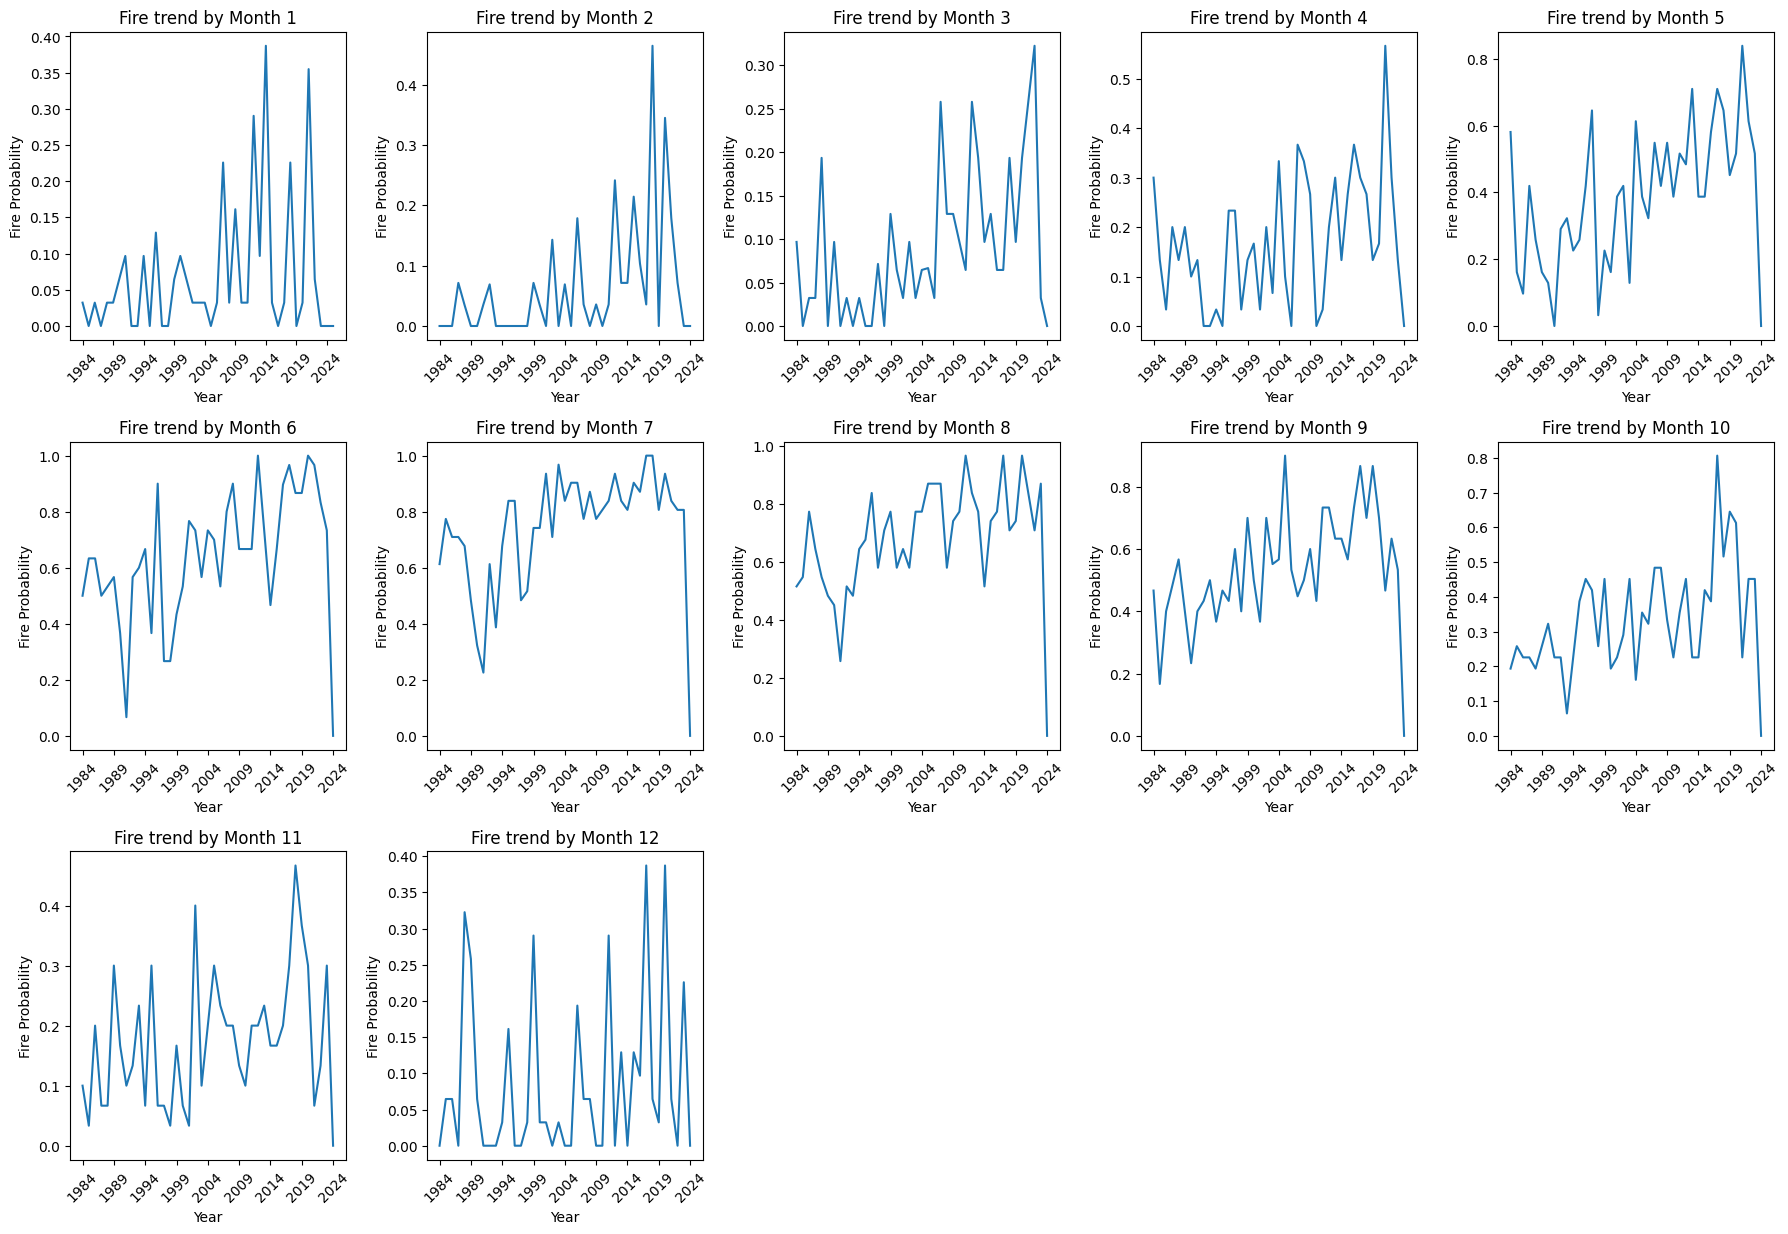

In [57]:
Annual_Fire=pd.pivot_table(df,index='YEAR',columns='MONTH',values='Fire_Occured',aggfunc='mean')
plt.figure(figsize=(18,20))
for i,c in enumerate(Annual_Fire):
    plt.subplot(5,5,i+1)
    sns.lineplot(x=Annual_Fire.index,y=Annual_Fire[c])
    plt.title(f"Fire trend by Month {c}")
    plt.xticks(Annual_Fire.index[::5],rotation=45)
    plt.xlabel('Year')
    plt.ylabel("Fire Probability")
plt.tight_layout()
plt.show()

### Insights

1️⃣ Winter Months (January–February)

Fire probability remains consistently low with only occasional spikes across years.

Cold temperatures and higher moisture reduce ignition likelihood.
➡ Winter months contribute minimally to wildfire activity and act as low-risk baseline periods.

2️⃣ Early Spring (March–April)

A gradual increase in fire probability is observed, with noticeable inter-year variability.

Some years show early fire onset.
➡ Drying vegetation during spring transition begins elevating wildfire risk.

3️⃣ Late Spring (May)

Fire probability rises sharply with frequent mid-to-high peaks.

Variability increases across years.
➡ May marks the transition into the active wildfire season.

4️⃣ Early Summer (June)

Fire probability consistently remains high, frequently exceeding 0.6–0.8.

Several years approach near-maximum fire likelihood.
➡ June is one of the most fire-prone months, driven by heat and fuel dryness.

5️⃣ Peak Summer (July–August)

July and August show the highest and most stable fire probabilities, often near 1.0.

Fire risk remains elevated across nearly all years.
➡ These months represent the peak wildfire season, requiring maximum preparedness and resource allocation.

6️⃣ Early Fall (September)

Fire probability remains high but shows slightly increased fluctuations.

Several extreme peaks are visible.
➡ September continues to be highly dangerous, often associated with wind-driven fires.

7️⃣ Late Fall (October)

Fire probability begins to decline but remains moderate to high in several years.

Some extreme spikes persist.
➡ October acts as a tapering phase of wildfire season, still requiring active monitoring.

8️⃣ Post-Season (November)

Fire probability drops significantly, with only sporadic peaks.

Most years show low activity.
➡ Cooler temperatures and moisture reduce wildfire risk substantially.

9️⃣ Early Winter (December)

Fire probability is consistently near zero across most years.

Only rare outliers appear.
➡ December marks the effective end of the wildfire season.

🔟 Long-Term Trend Observation

Across most months, especially summer and early fall, fire probability increases in later years.

Variability and peak values become more frequent after 2000.
➡ This suggests a long-term intensification of wildfire risk, likely influenced by climate change.

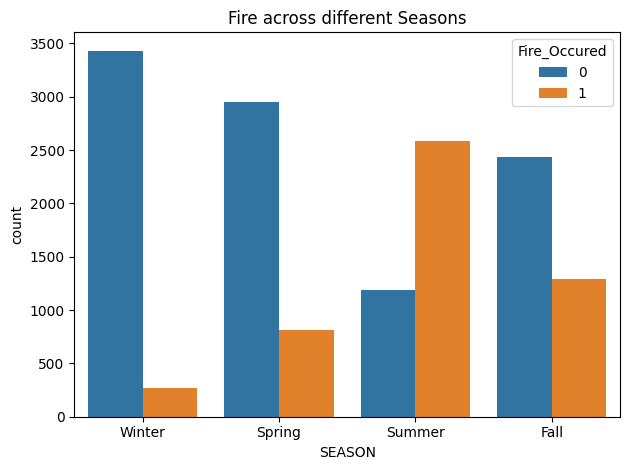

In [58]:
sns.countplot(x='SEASON',hue='Fire_Occured',data=df2)
plt.title("Fire across different Seasons")
plt.tight_layout()
plt.show()

### Insights

1️⃣ Winter

Fire occurrences are extremely low compared to non-fire days.

Cold temperatures and higher moisture dominate this season.
➡ Winter is the lowest-risk season for wildfires and serves as a baseline period.

2️⃣ Spring

Fire occurrences increase noticeably compared to winter.

Non-fire days still dominate, but fire activity begins to emerge.
➡ Spring acts as a transition season, where drying fuels start elevating wildfire risk.

3️⃣ Summer

Fire-occurrence days exceed non-fire days.

This season shows the highest concentration of wildfire events.
➡ Summer is the peak wildfire season, driven by high temperatures, dry conditions, and strong winds.

4️⃣ Fall

Fire occurrences remain high, though lower than summer.

Non-fire days regain dominance, but risk remains substantial.
➡ Fall is a high-risk continuation phase, often influenced by dry fuels and wind-driven events.

5️⃣ Overall Seasonal Pattern

Wildfire frequency follows a clear seasonal progression: Winter → Spring → Summer → Fall → Winter.

Risk peaks in summer and gradually declines afterward.
➡ Seasonal features are highly predictive and should be strongly weighted in wildfire prediction models.

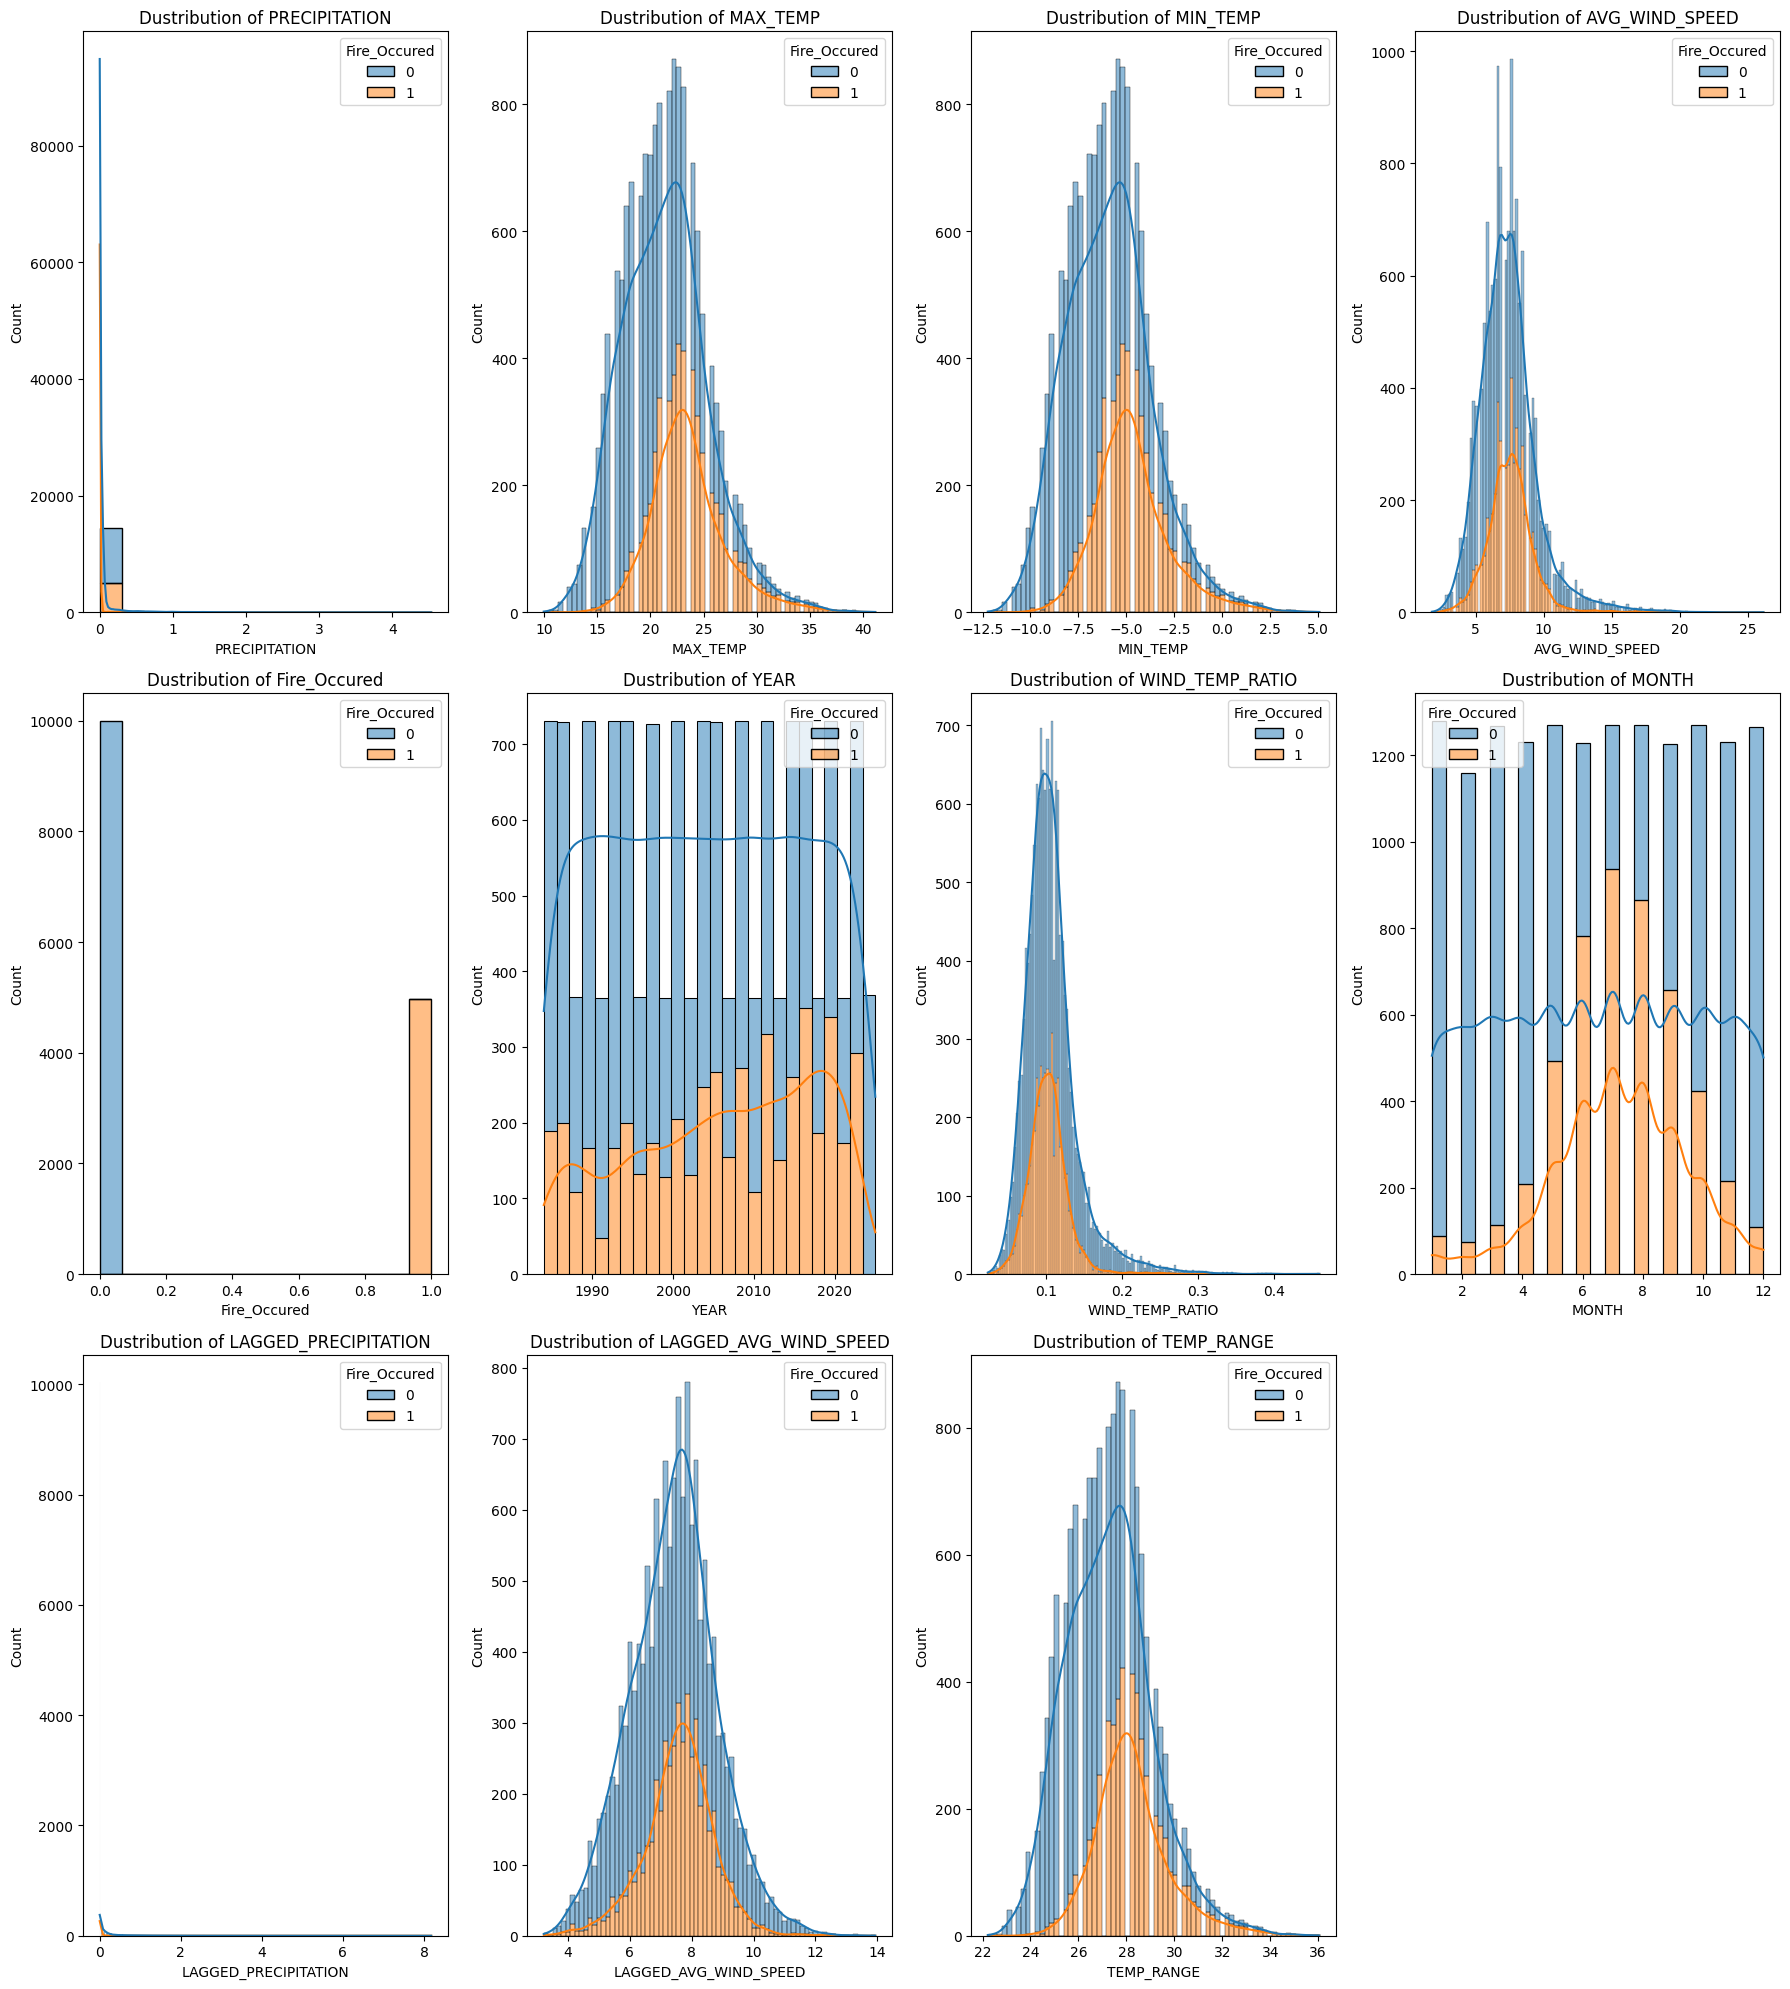

In [59]:
plt.figure(figsize=(18,20))
for i,c in enumerate(num):
    plt.subplot(3,4,i+1)
    sns.histplot(data=df2,x=c,hue='Fire_Occured',kde=True,multiple='stack')
    plt.title(f"Dustribution of {c}")
plt.tight_layout()
plt.show()

### Insights
Insights

1️⃣ Precipitation

Fire-occurrence days are heavily concentrated near zero precipitation.

Non-fire days show slightly higher spread, though still skewed toward low values.
➡ Near-zero rainfall strongly correlates with wildfire ignition, confirming dryness as a primary trigger.

2️⃣ Maximum Temperature (MAX_TEMP)

Fire days cluster at higher temperature ranges compared to non-fire days.

Non-fire days dominate lower and moderate temperature ranges.
➡ Higher maximum temperatures significantly increase wildfire probability by accelerating fuel drying.

3️⃣ Minimum Temperature (MIN_TEMP)

Fire days tend to occur when minimum temperatures are relatively higher (less cold nights).

Non-fire days include more extreme low minimum temperatures.
➡ Warmer nights contribute to sustained dryness, raising fire likelihood.

4️⃣ Average Wind Speed (AVG_WIND_SPEED)

Fire days are more frequent at moderate-to-high wind speeds.

Non-fire days dominate lower wind speed ranges.
➡ Elevated wind speeds increase both ignition and spread potential, making wind a key risk factor.

5️⃣ Fire Occurred (Target Variable)

Non-fire days vastly outnumber fire days.

Fire days represent a minority class.
➡ This confirms class imbalance, requiring special handling during model training.

6️⃣ Year

Fire occurrences show an increasing trend in later years.

Non-fire days remain relatively uniform across years.
➡ Wildfire frequency has intensified over time, suggesting climate-driven effects.

7️⃣ Wind–Temperature Ratio (WIND_TEMP_RATIO)

Fire days show slightly higher ratios compared to non-fire days.

Extreme ratio values are more frequent during fire occurrences.
➡ Combined heat–wind conditions amplify fire risk more than individual factors alone.

8️⃣ Month

Fire days peak strongly between May and September.

Non-fire days dominate winter months.
➡ Wildfires are highly seasonal, with summer months posing maximum risk.

9️⃣ Lagged Precipitation (7-day)

Fire days are almost entirely associated with low or zero lagged precipitation.

Non-fire days show slightly higher cumulative moisture.
➡ Extended dry spells over multiple days are critical precursors to wildfire ignition.

🔟 Lagged Average Wind Speed (7-day)

Fire days exhibit consistently higher sustained wind speeds.

Non-fire days cluster at lower lagged wind values.
➡ Persistent wind over consecutive days increases fire sustainability and spread.

1️⃣1️⃣ Temperature Range (TEMP_RANGE)

Fire days are more frequent at higher temperature range values.

Non-fire days cluster around lower variability.
➡ Large day–night temperature swings accelerate fuel moisture loss, increasing fire susceptibility.

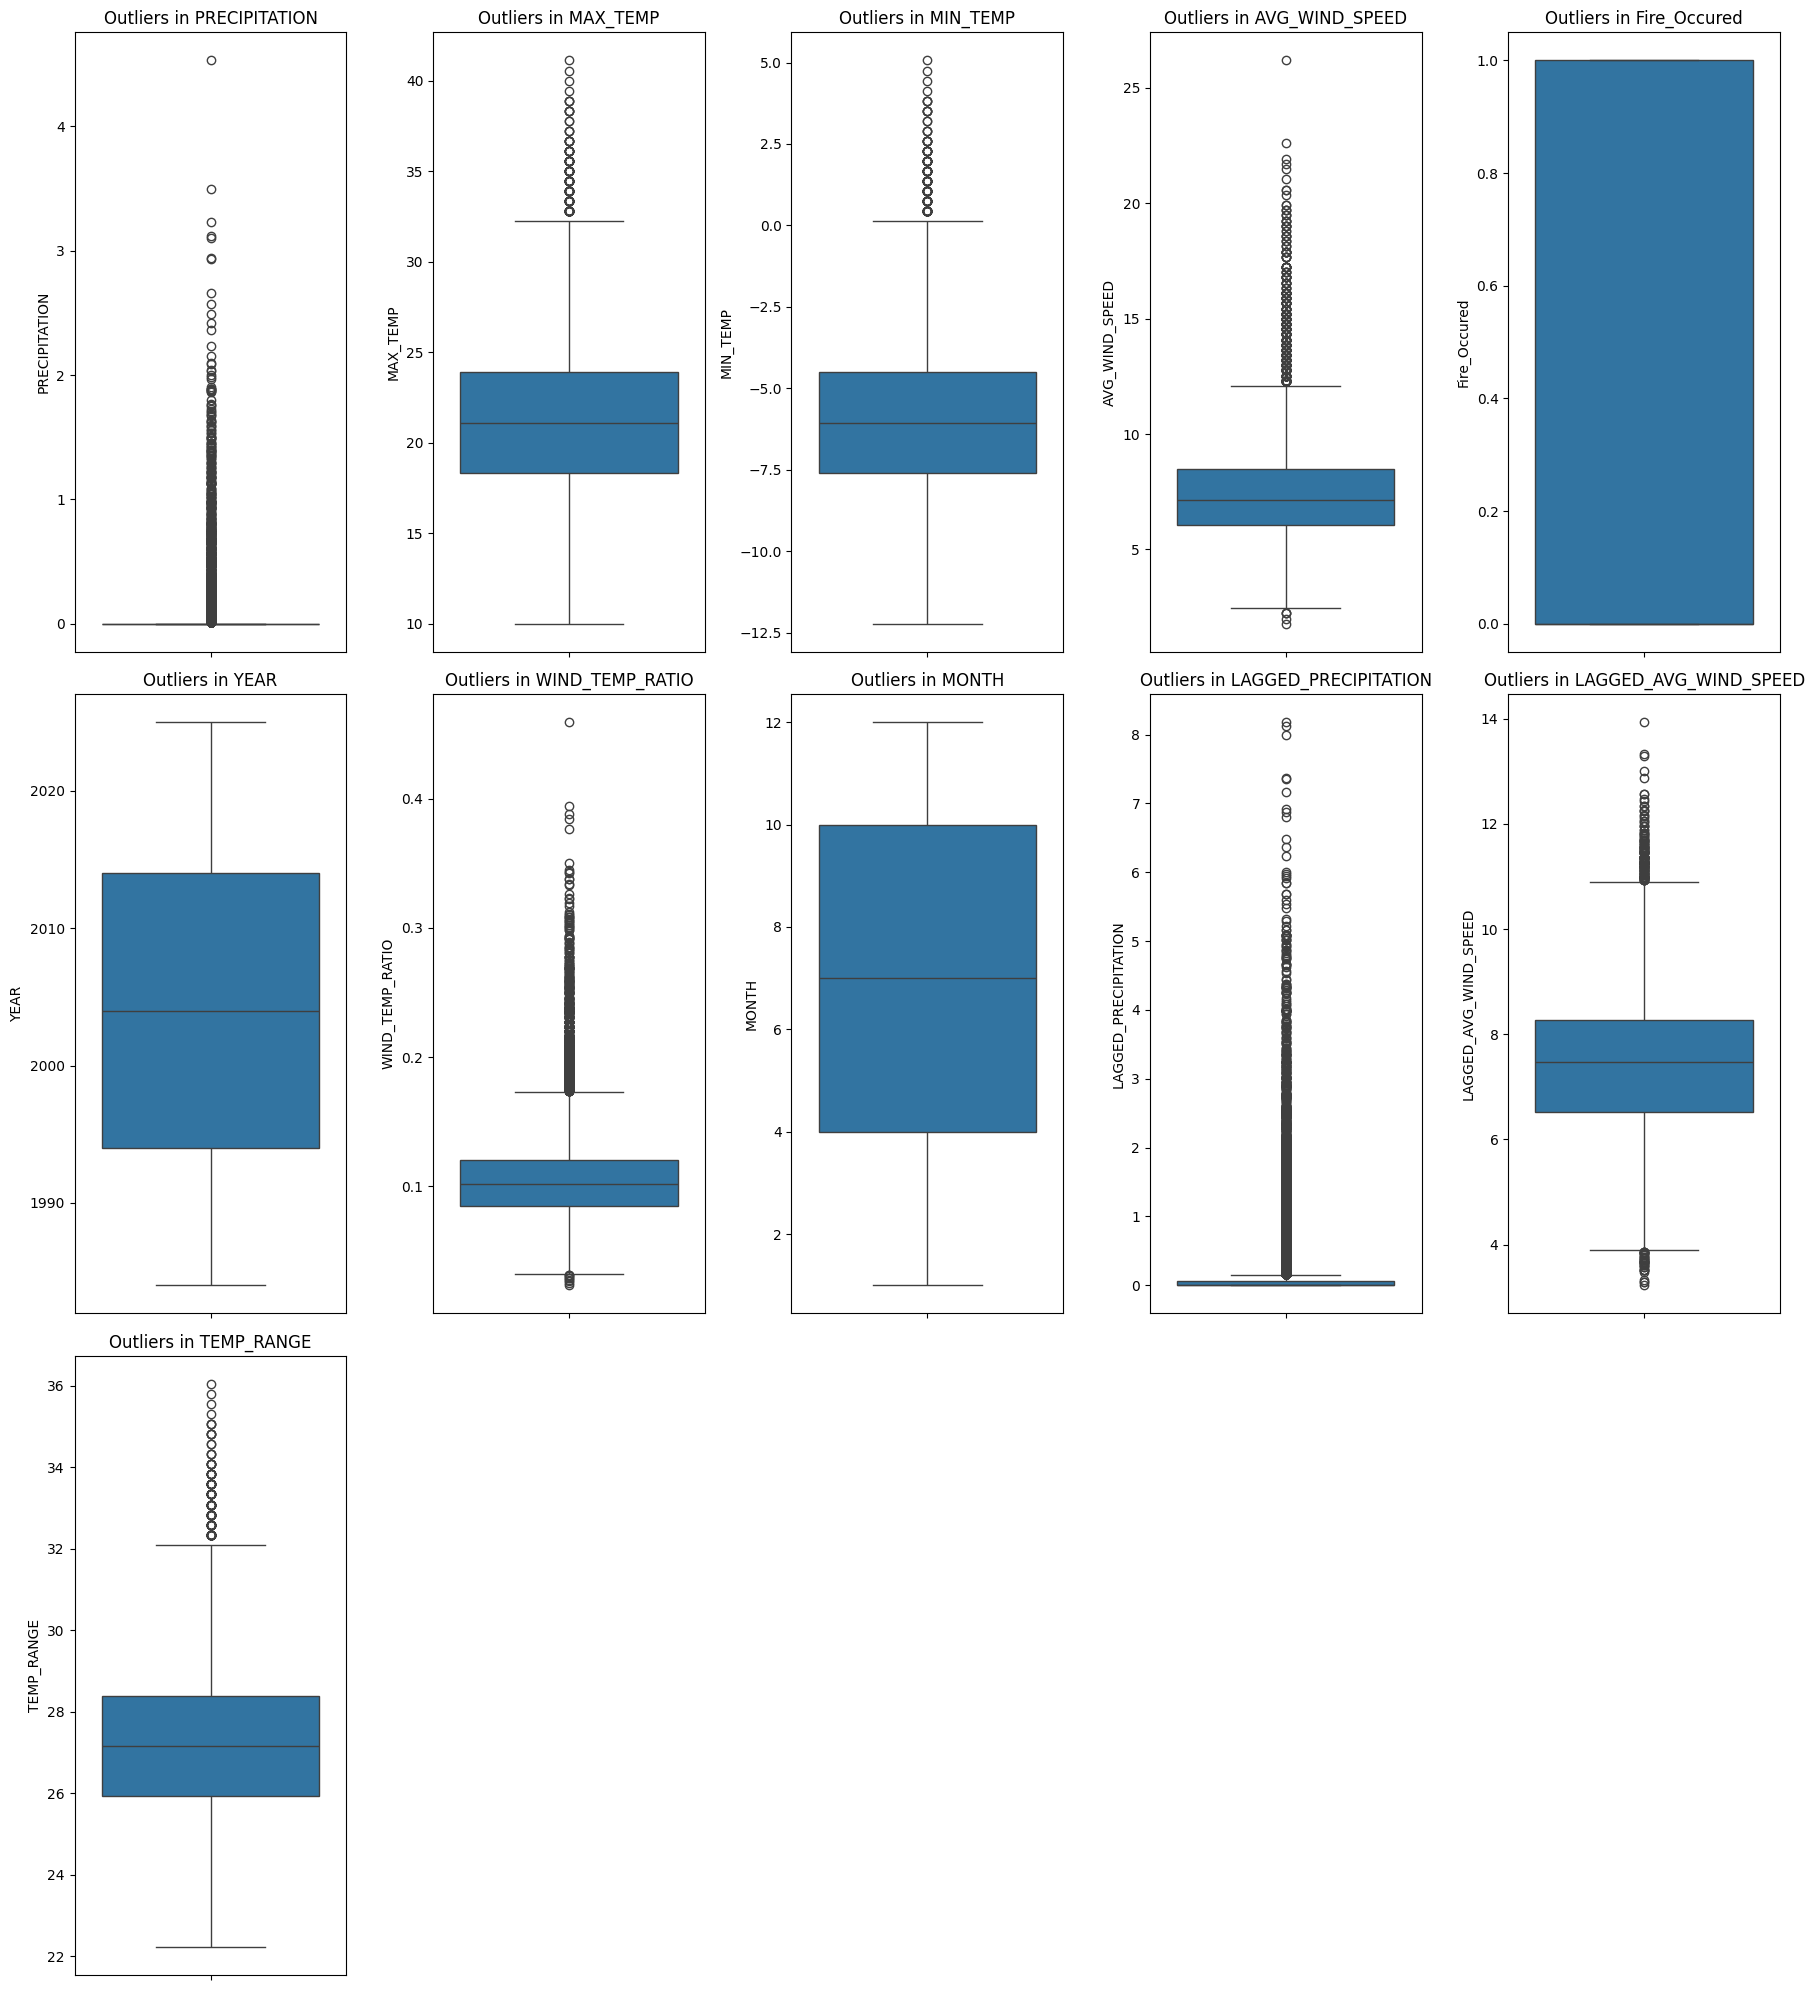

In [60]:
plt.figure(figsize=(18,20))
for i,c in enumerate(num):
    plt.subplot(3,5,i+1)
    sns.boxplot(y=c,data=df2)
    plt.title(f"Outliers in {c}")
plt.tight_layout()
plt.show()

### Insights

1️⃣ Precipitation

A large number of extreme upper outliers are present, while the median remains near zero.

Most days receive little to no rainfall.
➡ Heavy precipitation events are rare and episodic, while persistent dryness dominates wildfire conditions.

2️⃣ Maximum Temperature (MAX_TEMP)

Several high-end outliers exist beyond the upper whisker.

The majority of values cluster in a moderate temperature range.
➡ Extreme heat events, though infrequent, significantly elevate wildfire risk.

3️⃣ Minimum Temperature (MIN_TEMP)

Both low and high-end outliers are observed.

Median values remain relatively stable.
➡ Temperature extremes contribute to atmospheric instability, indirectly influencing fire behavior.

4️⃣ Average Wind Speed (AVG_WIND_SPEED)

Numerous upper outliers are visible, indicating occasional strong wind events.

Most values lie within a moderate range.
➡ High wind outliers are critical as they can rapidly escalate wildfire spread once ignition occurs.

5️⃣ Fire Occurred (Target Variable)

Binary distribution with no true statistical outliers.

Class imbalance is evident.
➡ Special preprocessing is required, but outlier treatment is not applicable for the target variable.

6️⃣ Year

No meaningful outliers are present.

Data is evenly distributed across the full time range.
➡ Temporal consistency confirms dataset reliability for long-term trend analysis.

7️⃣ Wind–Temperature Ratio (WIND_TEMP_RATIO)

Right-skewed distribution with several extreme upper outliers.

Most values cluster near the median.
➡ Extreme wind–heat combinations represent rare but highly dangerous wildfire conditions.

8️⃣ Month

Uniform categorical spread from 1 to 12 with no outliers.

Seasonal coverage is complete.
➡ Month should be treated as a categorical/ordinal feature, not subjected to outlier removal.

9️⃣ Lagged Precipitation (7-day)

Strong upper outliers exist, while most values remain near zero.

Indicates rare but intense rainfall periods.
➡ Sustained dryness across multiple days is a dominant wildfire precursor.

🔟 Lagged Average Wind Speed (7-day)

Several high-end outliers are observed.

Majority of values cluster around moderate sustained winds.
➡ Persistent high winds over multiple days increase fire persistence and spread risk.

1️⃣1️⃣ Temperature Range (TEMP_RANGE)

Upper outliers indicate days with extreme diurnal temperature variation.

Most values fall within a stable range.
➡ Large temperature swings accelerate moisture loss in fuels, elevating wildfire susceptibility.

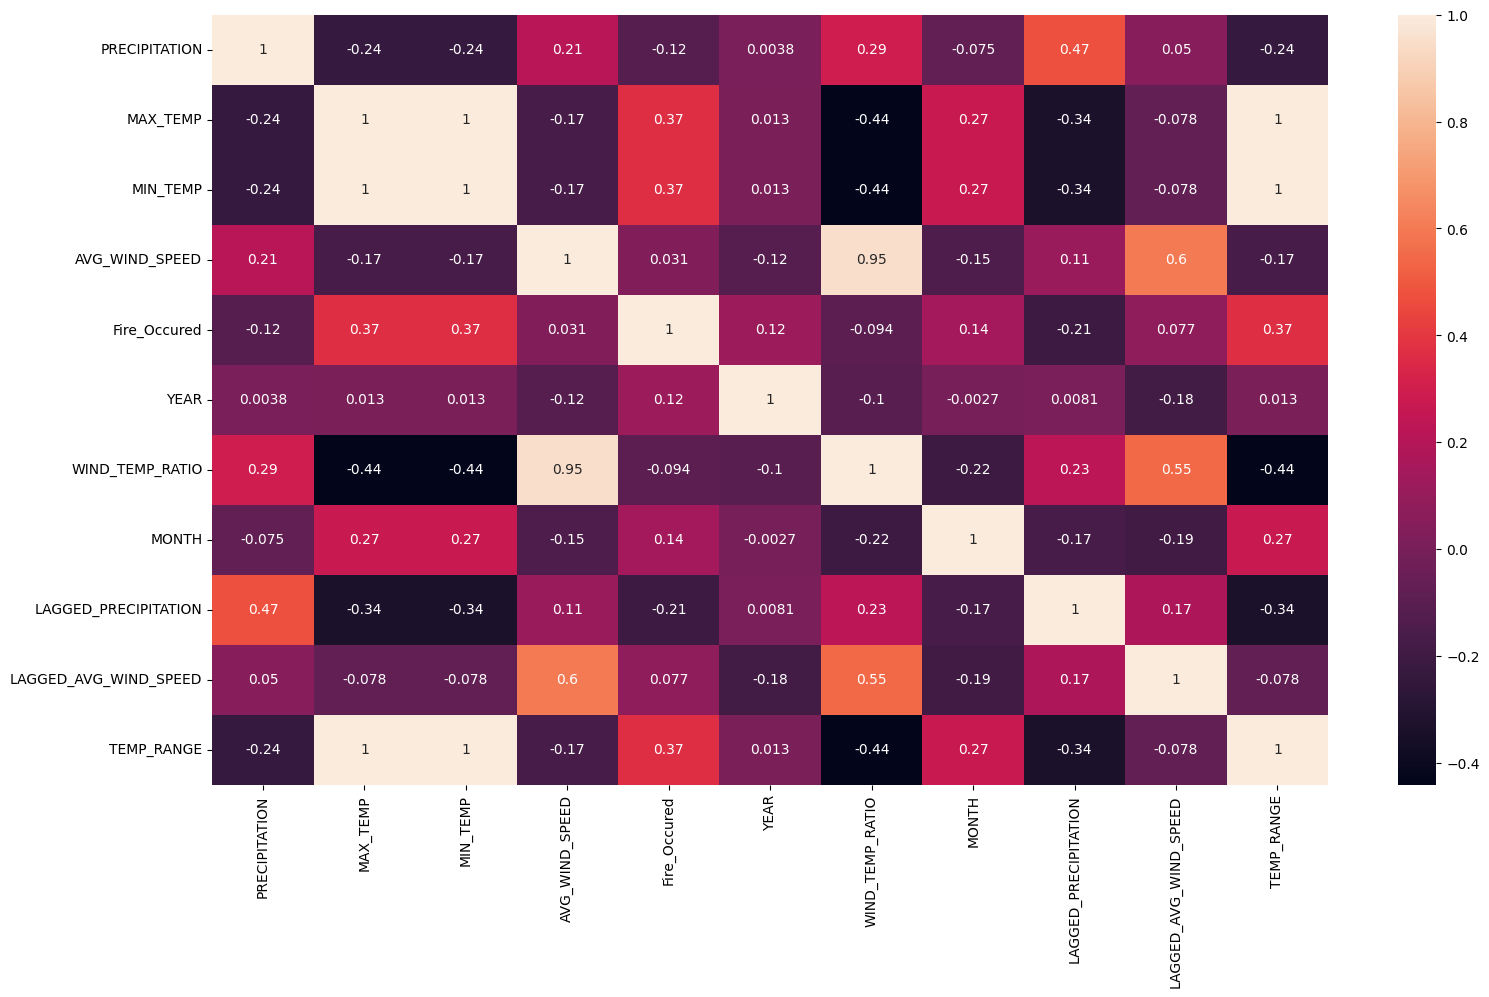

In [61]:
plt.figure(figsize=(18,10))
sns.heatmap(df2[num].corr(),annot=True)
plt.show()

### Insights

1️⃣ Maximum Temperature (MAX_TEMP) & Minimum Temperature (MIN_TEMP)

MAX_TEMP and MIN_TEMP show a perfect positive correlation (≈ 1.0).

Both also strongly correlate with TEMP_RANGE.
➡ These variables carry overlapping information, indicating high multicollinearity and potential redundancy.

2️⃣ Temperature vs Fire Occurrence

Fire_Occured shows a moderate positive correlation (~0.37) with MAX_TEMP, MIN_TEMP, and TEMP_RANGE.

Higher temperatures and larger temperature ranges align with more fire events.
➡ Heat is one of the strongest direct drivers of wildfire occurrence in the dataset.

3️⃣ Precipitation & Lagged Precipitation

Precipitation and LAGGED_PRECIPITATION show a moderate positive correlation (~0.47).

Fire_Occured is negatively correlated with both precipitation measures.
➡ Lower rainfall and prolonged dry spells significantly increase wildfire likelihood.

4️⃣ Average Wind Speed & Wind–Temperature Ratio

AVG_WIND_SPEED and WIND_TEMP_RATIO exhibit a very strong positive correlation (~0.95).

LAGGED_AVG_WIND_SPEED also correlates strongly with WIND_TEMP_RATIO (~0.55).
➡ Wind-related features are closely linked and jointly amplify fire spread risk.

5️⃣ Wind Factors vs Fire Occurrence

Direct correlation between AVG_WIND_SPEED and Fire_Occured is weak.

WIND_TEMP_RATIO shows a slightly negative but meaningful interaction.
➡ Wind alone is less predictive than wind combined with high temperature, supporting feature engineering value.

6️⃣ Month & Seasonal Influence

MONTH shows a moderate positive correlation (~0.27) with temperature features and Fire_Occured (~0.14).

Indicates seasonal clustering of fire events.
➡ Temporal seasonality plays a meaningful supporting role in wildfire prediction.

7️⃣ Year & Fire Occurrence

YEAR shows a weak positive correlation (~0.12) with Fire_Occured.

Other features remain relatively stable over time.
➡ This suggests a gradual long-term increase in wildfire frequency, possibly climate-driven.

8️⃣ Lagged Average Wind Speed

LAGGED_AVG_WIND_SPEED correlates moderately with AVG_WIND_SPEED (~0.6).

Correlation with Fire_Occured remains weak.
➡ Sustained winds matter more for fire spread than for initial ignition.

9️⃣ Multicollinearity Observation

Strong correlations exist among temperature-derived features and wind-derived features.

Independent signal contribution may be reduced.
➡ Tree-based models (Random Forest, XGBoost) are better suited than linear models for this dataset.

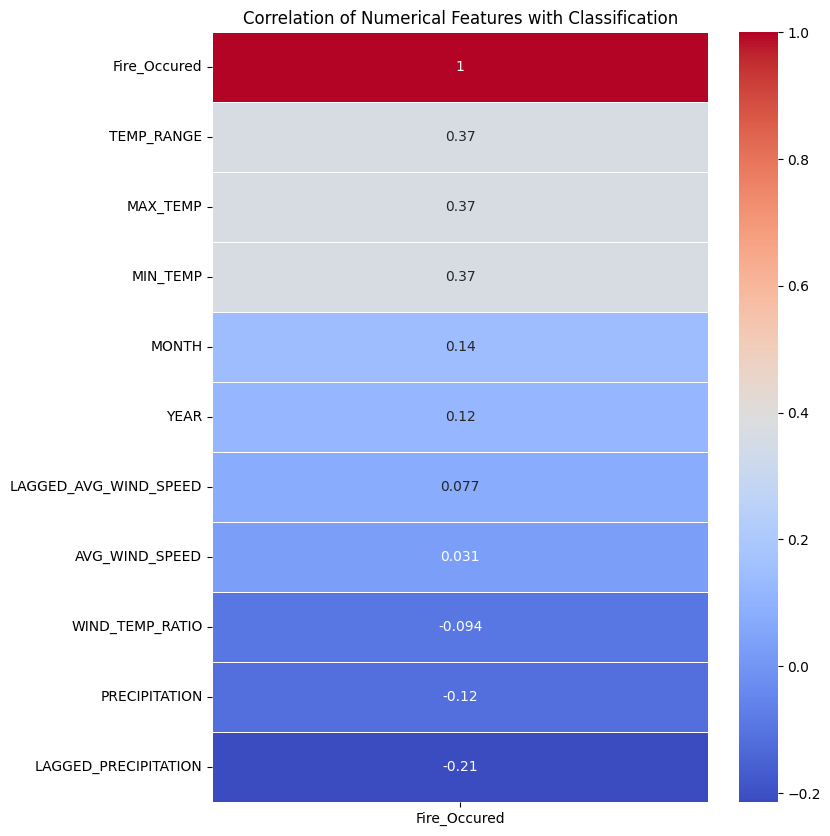

In [62]:
num_features = df.select_dtypes(include=['int64','float64'])

corr_with_target = num_features.corr()['Fire_Occured'].sort_values(ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(
    corr_with_target.to_frame(),
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title("Correlation of Numerical Features with Classification")
plt.show()

### Insights

1️⃣ Temperature Range (TEMP_RANGE)

TEMP_RANGE shows the highest positive correlation (~0.37) with fire occurrence.

Larger day–night temperature fluctuations are common on fire-start days.
➡ High temperature variability is a strong indicator of wildfire ignition risk.

2️⃣ Maximum & Minimum Temperature (MAX_TEMP, MIN_TEMP)

Both MAX_TEMP and MIN_TEMP have moderate positive correlations (~0.37) with Fire_Occured.

Warmer days and nights coincide with increased fire activity.
➡ Sustained heat is one of the strongest contributors to wildfire occurrence.

3️⃣ Month

MONTH shows a weak-to-moderate positive correlation (~0.14) with fire occurrence.

Fire activity increases in mid-year months.
➡ Seasonality plays a supporting role in wildfire prediction.

4️⃣ Year

YEAR has a weak positive correlation (~0.12) with Fire_Occured.

Slight upward trend in fire events over time.
➡ This suggests a gradual long-term increase in wildfire frequency, possibly climate-driven.

5️⃣ Lagged Average Wind Speed

LAGGED_AVG_WIND_SPEED has a weak positive correlation (~0.077).

Sustained wind alone is not a strong ignition driver.
➡ Wind contributes more to fire spread than initial ignition.

6️⃣ Average Wind Speed

AVG_WIND_SPEED shows a very weak correlation (~0.031) with fire occurrence.

Many windy days do not result in fires.
➡ Wind must combine with dry and hot conditions to significantly raise fire risk.

7️⃣ Wind–Temperature Ratio

WIND_TEMP_RATIO has a slight negative correlation (~−0.094) with Fire_Occured.

Extreme ratios are rare.
➡ This engineered feature captures interaction effects better suited for non-linear models.

8️⃣ Precipitation

PRECIPITATION is negatively correlated (~−0.12) with fire occurrence.

Fire days mostly occur under dry conditions.
➡ Low rainfall directly increases wildfire probability.

9️⃣ Lagged Precipitation (7-day)

LAGGED_PRECIPITATION shows the strongest negative correlation (~−0.21).

Prolonged dryness is common before fire events.
➡ Extended dry spells are among the most critical precursors to wildfire ignition.